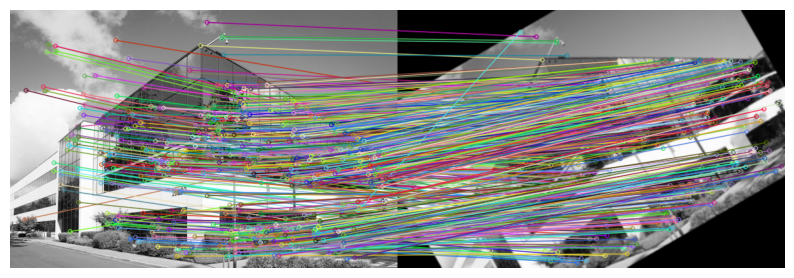

'/content/output_sift.png'

In [9]:
import cv2
import matplotlib.pyplot as plt

img1_path = '/content/image1.jpeg'
img2_path = '/content/image2.jpg'

img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

img_match = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=2)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img_match, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

output_path = '/content/output_sift.png'
cv2.imwrite(output_path, img_match)

output_path


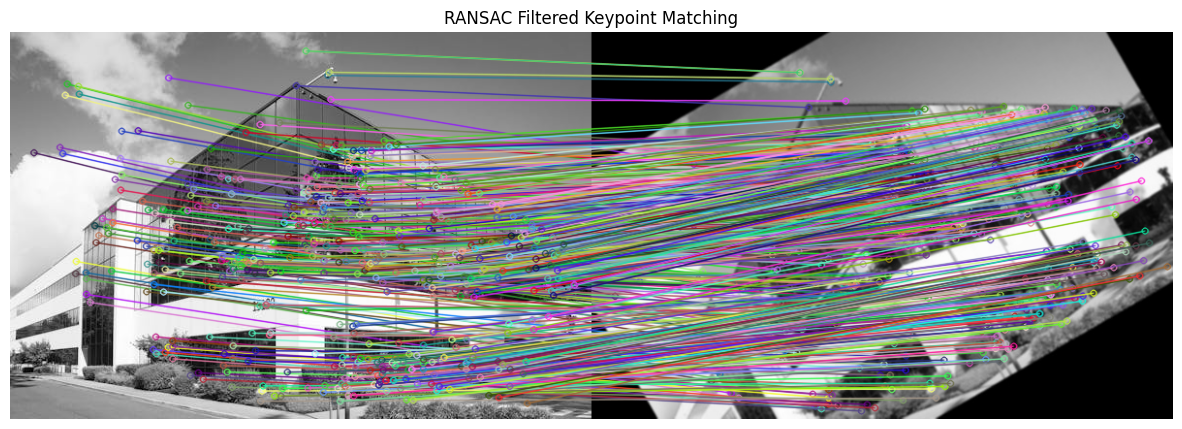

In [11]:
import numpy as np
img1 = cv2.imread('image1.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
pts1, pts2 = [], []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1, pts2 = np.float32(pts1), np.float32(pts2)

H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC)
matchesMask = mask.ravel().tolist()

img_ransac = cv2.drawMatches(img1, kp1, img2, kp2, good, None, matchesMask=matchesMask, flags=2)

cv2.imwrite('output_ransac.png', img_ransac)

img_rgb = cv2.cvtColor(img_ransac, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('RANSAC Filtered Keypoint Matching')
plt.show()


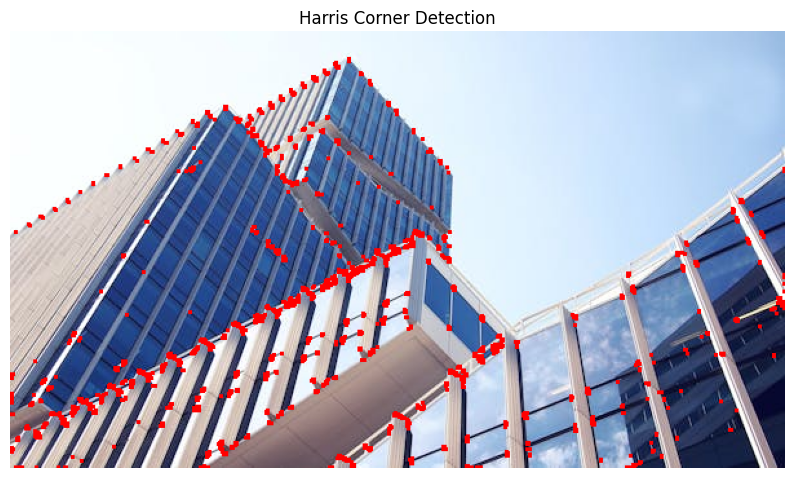

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('architecture-building-amsterdam-blue-sky-162539.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

dst = cv2.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]

cv2.imwrite('output_harris.png', img)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Harris Corner Detection')
plt.show()